# 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
from sympy.polys.polyfuncs import interpolate
with np.load('data_interp.npz') as data:
  x1, y1 = data['x1'], data['y1']

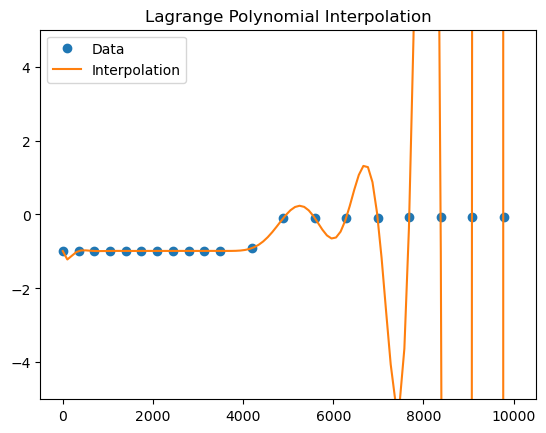

In [3]:
t = smp.Symbol('t')

points = list(zip(x1, y1))

interpolation_polynomial = interpolate(points, t)

f = smp.lambdify(t, interpolation_polynomial, 'numpy')

xnew = np.linspace(0, 10000, 100)

plt.figure()
plt.title('Lagrange Polynomial Interpolation')
plt.plot(x1, y1, 'o', label='Data')
plt.plot(xnew, f(xnew), label='Interpolation')
plt.legend()
plt.ylim([-5, 5])
plt.show()

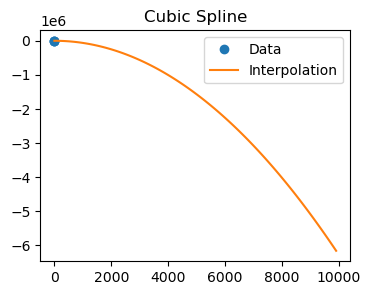

In [17]:
from scipy.interpolate import CubicSpline

pol = CubicSpline(x1,y1)
newallx=np.arange(0,10000,100)
newally=pol(newallx)

from matplotlib.pyplot import figure
figure(figsize=(4, 3))

plt.title('Cubic Spline')
plt.plot(x1, y1, 'o', newallx, newally, '-',)
plt.legend(['Data', 'Interpolation'])
plt.show()

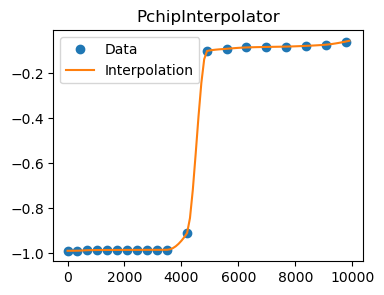

In [18]:
from scipy.interpolate import PchipInterpolator

pol = PchipInterpolator(x1,y1)
newallx=np.arange(0,10000,100)
newally=pol(newallx)

from matplotlib.pyplot import figure
figure(figsize=(4, 3))

plt.title('PchipInterpolator')
plt.plot(x1, y1, 'o', newallx, newally, '-',)
plt.legend(['Data', 'Interpolation'])
plt.show()

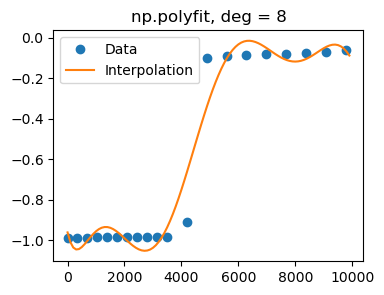

In [24]:
p = np.polyfit(x1,y1,8)
pol = np.poly1d(p)
newallx=np.arange(0,10000,100)
newally=pol(newallx)

from matplotlib.pyplot import figure
figure(figsize=(4, 3))

plt.title('np.polyfit, deg = 8')
plt.plot(x1, y1, 'o', newallx, newally, '-',)
plt.legend(['Data', 'Interpolation'])
plt.show()

# 2

In [4]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.

    Given a set of pairs ``(x_k, y_k)``, construct
    a Lagrange polynomial ``f(x)``, such that

    .. math::

        f(x_k) = y_k   for k =0, ..., n-1

    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates

    Attributes
    ----------
    __call__

    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)

    def __call__(self, x):
        """Evaluate the interpolator at a given point.

        Parameters
        ----------
        x : float

        Returns
        -------
        the value of the interpolator at ``x``.
        """
        from scipy.interpolate import lagrange
        poly = lagrange(self.xk, self.yk)
        return poly(x)
        raise NotImplementedError()
    
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-5)

# 3

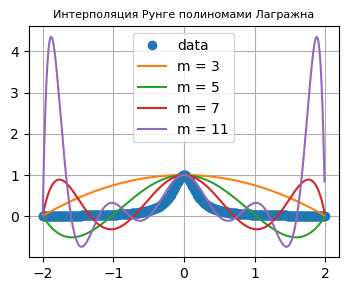

In [6]:
# Полиномы Лагранжа
from scipy.interpolate import lagrange

def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

x1 = np.array([-2,0,2])
y1 = runge_func(x1)
pol1 = lagrange(x1, y1)
x=np.arange(-2,2,0.01)
newally1=pol1(x)

x2 = np.array([-2,-1,0,1,2])
y2 = runge_func(x2)
pol2 = lagrange(x2, y2)
newally2=pol2(x)

x3 = np.array([-2,-4/3,-2/3,0,2/3,4/3,2])
y3 = runge_func(x3)
pol3 = lagrange(x3, y3)
newally3=pol3(x)

x4 = np.array([-2,-1.6,-1.2,-0.8,-0.4,0,0.4,0.8,1.2,1.6,2])
y4 = runge_func(x4)
pol4 = lagrange(x4, y4)
newally4=pol4(x)

from matplotlib.pyplot import figure
figure(figsize=(4, 3))

plt.title('Интерполяция Рунге полиномами Лагражна',size=8)
plt.plot(x, runge_func(x), 'o', x, newally1, '-',x, newally2, '-',
         x, newally3, '-',x, newally4, '-')
plt.legend(['data', 'm = 3', 'm = 5', 'm = 7', 'm = 11'], loc = 'best')
plt.grid()
plt.show()

In [7]:
# Чебышев

def cheb_nodes(n, a=-1, b=1):
    r"""Chebyshev nodes of degree $n$ on $[a, b]$
    """
    i = np.array(range(n))
    x = np.cos((2*i+1)*np.pi/(2*(n)))
    return np.flip(0.5*(b-a)*x+0.5*(b+a))
    raise NotImplementedError()

nodes_11 = cheb_nodes(11)
nodes_11 = np.asarray(nodes_11)
assert (nodes_11[1:] > nodes_11[:-1]).all()

from scipy.special import roots_chebyt
nodes, weights = roots_chebyt(5)

assert_allclose(cheb_nodes(5), nodes, atol=1e-14)

assert_allclose(cheb_nodes(5, a=-1, b=3),
                nodes*2 + 1, atol=1e-14)

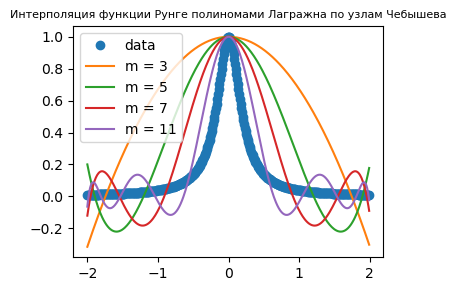

In [8]:
# Повторите интерполяцию Лагранжа функции Рунге с помощью узлов Чебышева
from scipy.interpolate import lagrange

def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

x1 = cheb_nodes(3,-2,2)
y1 = runge_func(x1)
pol1 = lagrange(x1, y1)
x=np.arange(-2,2,0.01)
newally1=pol1(x)

x2 = cheb_nodes(5,-2,2)
y2 = runge_func(x2)
pol2 = lagrange(x2, y2)
newally2=pol2(x)

x3 = cheb_nodes(7,-2,2)
y3 = runge_func(x3)
pol3 = lagrange(x3, y3)
newally3=pol3(x)

x4 = cheb_nodes(11,-2,2)
y4 = runge_func(x4)
pol4 = lagrange(x4, y4)
newally4=pol4(x)

from matplotlib.pyplot import figure
figure(figsize=(4, 3))

plt.title('Интерполяция функции Рунге полиномами Лагражна по узлам Чебышева',size=8)
plt.plot(x, runge_func(x), 'o', x, newally1, '-',x, newally2, '-',
         x, newally3, '-',x, newally4, '-')
plt.legend(['data', 'm = 3', 'm = 5', 'm = 7', 'm = 11'], loc = 'best')
plt.show()

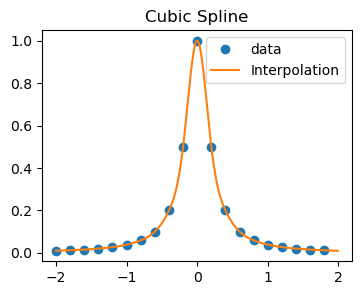

In [9]:
from scipy.interpolate import CubicSpline

x0 = np.arange(-2,2,0.2)
y0 = runge_func(x0)
pol = CubicSpline(x0,y0)
newallx=np.arange(-2,2,0.01)
newally=pol(newallx)

from matplotlib.pyplot import figure
figure(figsize=(4, 3))

plt.title('Cubic Spline')
plt.plot(x0, y0, 'o', newallx, newally, '-',)
plt.legend(['data', 'Interpolation'], loc = 'best')
plt.show()

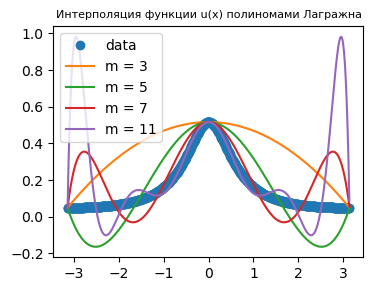

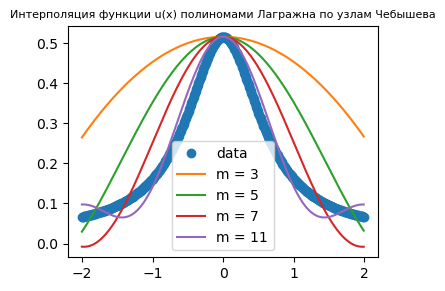

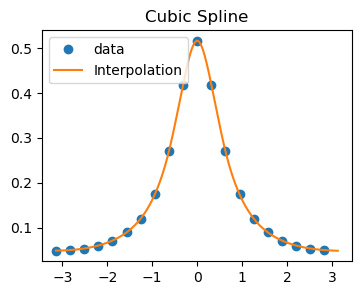

In [10]:
"""
ДРУГИЕ ТЕСТЫ
"""

#1

def u(x, e=0.21):
  return ((e*(2+e))**(1/2))/(2*np.pi*(1+e-np.cos(x)))

x1 = np.array([-2,0,2])*(np.pi/2)
y1 = u(x1)
pol1 = lagrange(x1, y1)
x=np.arange(-np.pi,np.pi,0.01)
newally1=pol1(x)

x2 = np.array([-2,-1,0,1,2])*(np.pi/2)
y2 = u(x2)
pol2 = lagrange(x2, y2)
newally2=pol2(x)

x3 = np.array([-2,-4/3,-2/3,0,2/3,4/3,2])*(np.pi/2)
y3 = u(x3)
pol3 = lagrange(x3, y3)
newally3=pol3(x)

x4 = np.array([-2,-1.6,-1.2,-0.8,-0.4,0,0.4,0.8,1.2,1.6,2])*(np.pi/2)
y4 = u(x4)
pol4 = lagrange(x4, y4)
newally4=pol4(x)

from matplotlib.pyplot import figure
figure(figsize=(4, 3))

plt.title('Интерполяция функции u(x) полиномами Лагражна',size=8)
plt.plot(x, u(x), 'o', x, newally1, '-',x, newally2, '-',
         x, newally3, '-',x, newally4, '-')
plt.legend(['data', 'm = 3', 'm = 5', 'm = 7', 'm = 11'], loc = 'best')
plt.show()


#2

def u(x, e=0.21):
  return ((e*(2+e))**(1/2))/(2*np.pi*(1+e-np.cos(x)))

x1 = cheb_nodes(3,-np.pi,np.pi)
y1 = u(x1)
pol1 = lagrange(x1, y1)
x=np.arange(-2,2,0.01)
newally1=pol1(x)

x2 = cheb_nodes(5,-np.pi,np.pi)
y2 = u(x2)
pol2 = lagrange(x2, y2)
newally2=pol2(x)

x3 = cheb_nodes(7,-np.pi,np.pi)
y3 = u(x3)
pol3 = lagrange(x3, y3)
newally3=pol3(x)

x4 = cheb_nodes(11,-np.pi,np.pi)
y4 = u(x4)
pol4 = lagrange(x4, y4)
newally4=pol4(x)

from matplotlib.pyplot import figure
figure(figsize=(4, 3))

plt.title('Интерполяция функции u(x) полиномами Лагражна по узлам Чебышева',size=8)
plt.plot(x, u(x), 'o', x, newally1, '-',x, newally2, '-',
         x, newally3, '-',x, newally4, '-')
plt.legend(['data', 'm = 3', 'm = 5', 'm = 7', 'm = 11'], loc = 'best')
plt.show()


#3
x0 = np.arange(-2,2,0.2)*(np.pi/2)
y0 = u(x0)
pol = CubicSpline(x0,y0)
newallx=np.arange(-2,2,0.01)*(np.pi/2)
newally=pol(newallx)

from matplotlib.pyplot import figure
figure(figsize=(4, 3))

plt.title('Cubic Spline')
plt.plot(x0, y0, 'o', newallx, newally, '-',)
plt.legend(['data', 'Interpolation'], loc = 'best')
plt.show()

# 4

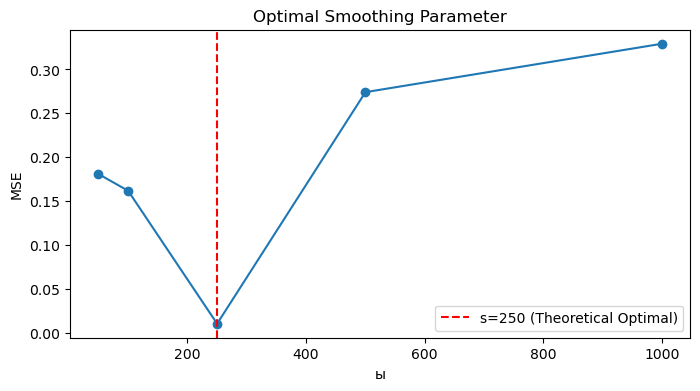

In [11]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

t = np.linspace(0, 10, 1000)
y_true = np.sin(t)
noise = 0.5 * np.random.randn(len(t))
y_noisy = y_true + noise

# optimal = 0.25*datapoints
s_values = [50, 100, 250, 500, 1000]
mse_list = []

for s in s_values:
    spl = UnivariateSpline(t, y_noisy, s=s)
    y_pred = spl(t)
    mse = np.mean((y_pred - y_true)**2)
    mse_list.append(mse)

plt.figure(figsize=(8, 4))
plt.plot(s_values, mse_list, 'o-')
plt.xlabel('ы')
plt.ylabel('MSE')
plt.title('Optimal Smoothing Parameter')
plt.axvline(250, color='red', linestyle='--', label='s=250 (Theoretical Optimal)')
plt.legend()
plt.show()

# 5

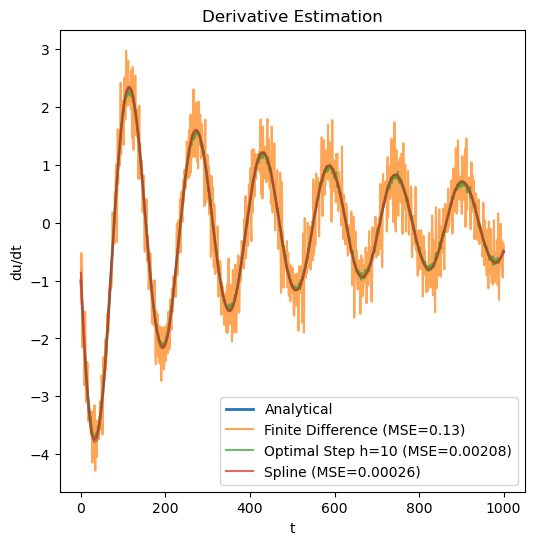

In [14]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

t = np.linspace(0, 1000, 1000)
u_clean = 200 / (1 + t/200) * (0.5 + 0.5 * np.cos(0.04 * t))
noise = 0.5 * np.random.randn(len(t))
u = u_clean + noise

def analytical_derivative(t):
    term1 = -40000 / (200 + t)**2 * (0.5 + 0.5 * np.cos(0.04 * t))
    term2 = (40000 / (200 + t)) * (-0.02 * np.sin(0.04 * t))
    return term1 + term2

du_analytical = analytical_derivative(t)

# Method 1: 
du_fd = np.zeros_like(t)
du_fd[1:-1] = (u[2:] - u[:-2]) / 2.0  
du_fd[0] = u[1] - u[0]
du_fd[-1] = u[-1] - u[-2]

# Method 2:
best_h = 1
best_mse = np.inf
for h in range(1, 21):
    du_opt = np.zeros_like(t)
    valid_indices = np.arange(h, len(t)-h)
    du_opt[valid_indices] = (u[valid_indices + h] - u[valid_indices - h]) / (2 * h)
    mse = np.mean((du_opt[valid_indices] - du_analytical[valid_indices])**2)
    if mse < best_mse:
        best_mse = mse
        best_h = h

du_opt = np.zeros_like(t)
valid_indices = np.arange(best_h, len(t)-best_h)
du_opt[valid_indices] = (u[valid_indices + best_h] - u[valid_indices - best_h]) / (2 * best_h)

# Method 3:
spl = UnivariateSpline(t, u, s=250)
du_spline = spl.derivative()(t)

mse_fd = np.mean((du_fd - du_analytical)**2)
mse_opt = np.mean((du_opt[valid_indices] - du_analytical[valid_indices])**2)
mse_spline = np.mean((du_spline - du_analytical)**2)

plt.figure(figsize=(6, 6))
plt.plot(t, du_analytical, label='Analytical', linewidth=2)
plt.plot(t, du_fd, label=f'Finite Difference (MSE={mse_fd:.2f})', alpha=0.7)
plt.plot(t[valid_indices], du_opt[valid_indices], 
         label=f'Optimal Step h={best_h} (MSE={mse_opt:.5f})', alpha=0.7)
plt.plot(t, du_spline, label=f'Spline (MSE={mse_spline:.5f})', alpha=0.7)
plt.xlabel('t')
plt.ylabel('du/dt')
plt.title('Derivative Estimation')
plt.legend()
plt.show()